In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Importing handwritten digits dataset from keras.dataset

In [10]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
len(X_train)

60000

In [20]:
X_train.shape

(60000, 28, 28)

X_train contains 60000 2D arrays and each 2D array is 28x28 which represents a digit

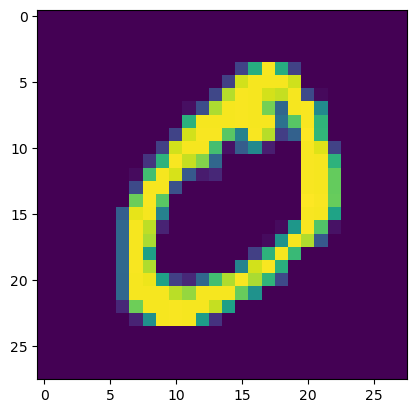

In [29]:
plt.imshow(X_train[1]) # alternate command - plt.matshow(X_train[1])

since we have 2D array, we will have to flatten (convert 2D into 1D array) the dataset to feed our neural network.
a 2D array contains 28x28 fields
28 x 28 = 784.
So, our 1D array will contain 784 flieds.
and we will feed each field to our Neural network
meaning we will have 784 input neurons

In [55]:
X_train.shape

(60000, 28, 28)

In [70]:
#scaling the input data to be betweem 0 to 1.
X_train = X_train / 255
X_test = X_test / 255

In [72]:
X_train_flat = X_train.reshape(len(X_train) , 28*28)
X_test_flat = X_test.reshape(len(X_test) , 28*28)

In [73]:
X_train_flat.shape

(60000, 784)

In [76]:
X_test_flat.shape

(10000, 784)

Now, we will create a simple Neural Network

In [79]:
model = keras.Sequential([
    #defining input and output layer
    keras.layers.Dense( 10 , input_shape = (784,) , activation = 'sigmoid')
])

#Dense means all the neurons will interconnected to each neuron
model.compile(
    optimizer = 'adam', # it will allow u to reach to global optimum 
    loss = 'sparse_categorical_crossentropy', # sparse is used when we have numerical data, otherwise we can use the 
    # categorical_crossentropy 
    # we are using categorical loss function bcz we have 10 categories for classification
    metrics = ['accuracy']
)

model.fit(X_train_flat, y_train , epochs = 5)
# epochs means the number of iterations for which our model will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 582us/step - accuracy: 0.5019 - loss: 2.2446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.6991 - loss: 2.0267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.7253 - loss: 1.8339
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.7557 - loss: 1.6632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.7773 - loss: 1.5171


TO increase the accuracy we can scale our dataset to be between 0 and 1
our 2d array contained values from 0 to 255
but we can make them between 0 to 1.

In [81]:
model.evaluate(X_test_flat , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7742 - loss: 1.4580


[1.4044948816299438, 0.8033999800682068]

In [103]:
y_predicted = model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


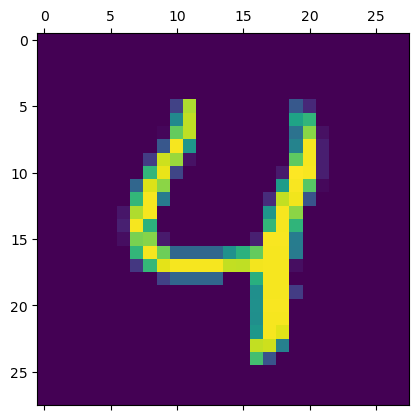

In [105]:
plt.matshow(X_test[4])

In [111]:
y_predicted[4]

array([0.38099632, 0.28383562, 0.4575112 , 0.33332255, 0.67411345,
       0.37830538, 0.4530406 , 0.51818097, 0.38524085, 0.5609728 ],
      dtype=float32)

In [113]:
np.argmax(y_predicted[4])

4

In [124]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[4]

4

Creating a confusion matrix

In [126]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_label)

In [128]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 925,    2,    5,    9,    0,    3,   30,    1,    5,    0],
       [   0, 1109,    9,    4,    0,    1,    4,    0,    8,    0],
       [  19,   81,  798,   30,   14,    0,   35,   22,   32,    1],
       [   6,   50,   27,  864,    1,    2,    5,   24,   23,    8],
       [   2,   48,    3,    0,  781,    0,   31,    9,    4,  104],
       [  37,  108,    5,  205,   31,  391,   28,   40,   21,   26],
       [  27,   47,    6,    0,   12,   10,  855,    0,    1,    0],
       [   2,   69,   14,    2,    9,    0,    3,  901,    7,   21],
       [  23,   94,   11,   99,   17,    7,   18,   25,  656,   24],
       [  23,   43,    5,   12,   72,    0,    1,   92,    7,  754]])>

Text(95.72222222222221, 0.5, 'actual')

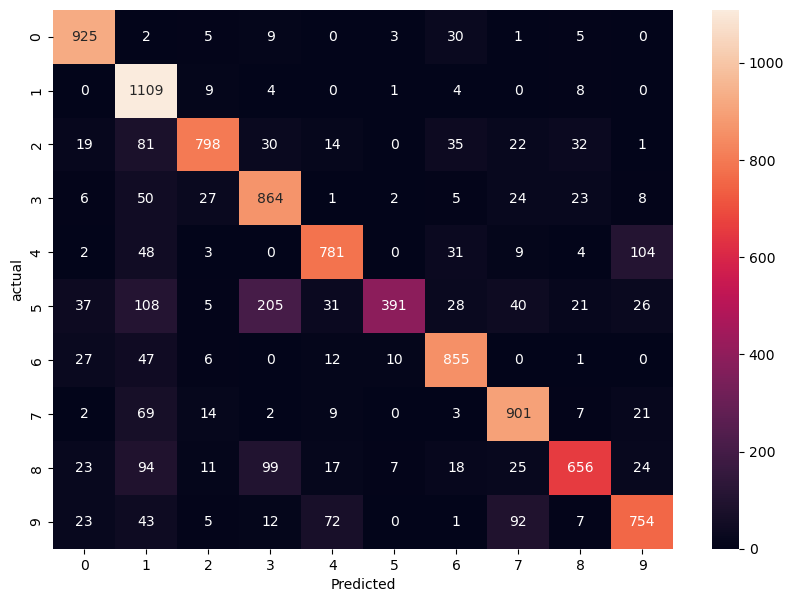

In [130]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('actual')


Now, adding a hidden layer to our model

In [171]:
model = keras.Sequential([
    #defining input and output layer
    keras.layers.Dense( 300 , input_shape = (784,) , activation = 'tanh'), # 300 hidden layers
    keras.layers.Dense( 10 , activation = 'sigmoid')
    # using relu/tanh in input layer and sigmoid in hidden layer
    #using softmax in hidden layer will be better because - 
    # mentioned below -
])

#Dense means all the neurons will interconnected to each neuron
model.compile(
    optimizer = 'adam', # it will allow u to reach to global optimum 
    loss = 'sparse_categorical_crossentropy', # sparse is used when we have numerical data, otherwise we can use the 
    # categorical_crossentropy 
    # we are using categorical loss function bcz we have 10 categories for classification
    metrics = ['accuracy']
)

model.fit(X_train_flat, y_train , epochs = 5)
# epochs means the number of iterations for which our model will run the training

Epoch 1/5


C:\Users\ankit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6789 - loss: 1.2674
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8988 - loss: 0.3576
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9091 - loss: 0.3160
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9157 - loss: 0.2949
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9199 - loss: 0.2880


Using sigmoid in the output layer with 10 output classes is not ideal for a multi-class classification problem. The sigmoid activation is better suited for binary classification tasks.
For multi-class classification (like the 10 classes of the MNIST dataset), you should use softmax in the output layer to normalize the output into probabilities for each class.

We can see that our accuracy increased from 77 to 91

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


Text(95.72222222222221, 0.5, 'actual')

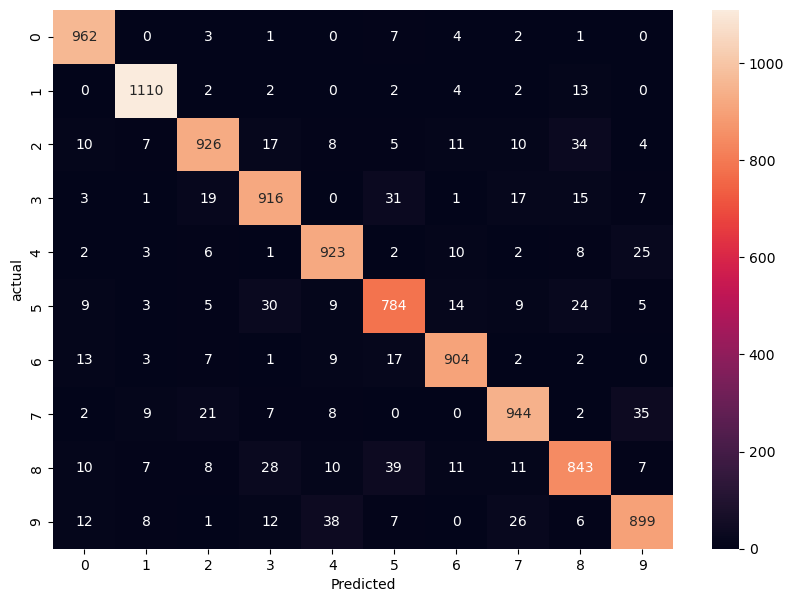

In [174]:
y_predicted = model.predict(X_test_flat)
y_predicted_label = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_label)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [189]:
# another way to create a flatten array and model

model = keras.Sequential([
    #defining input and output layer
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense( 300 , activation = 'tanh'), # 100 hidden layers
    keras.layers.Dense( 10 , activation = 'softmax')
    # using tanh in input layer and sigmoid in hidden layer
])

#Dense means all the neurons will interconnected to each neuron
model.compile(
    optimizer = 'RMSprop', # it will allow u to reach to global optimum 
    loss = 'sparse_categorical_crossentropy', # sparse is used when we have numerical data, 
    # However, if your labels were one-hot encoded, you would use categorical_crossentropy
    # we are using categorical loss function bcz we have 10 categories for classification
    metrics = ['accuracy']
)

model.fit(X_train, y_train , epochs = 5)
# epochs means the number of iterations for which our model will run the training

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4119 - loss: 1.8930
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8520 - loss: 0.5496
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3987
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8957 - loss: 0.3598
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9038 - loss: 0.3366


import tensorflow as tf
from tensorflow import keras-> 
# Define the model
model = keras.Sequential([->    # Explicitly define the Input layer
    keras.layers.Input(shape=(784,)),
  n='sompile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metri)

# Train the model
model.fit(X_train_flat, y_train, epochs=5)
